In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [192]:
df = pd.read_csv('D:/Projects/Retail-Sales-Analysis/data/superstore.csv' , encoding ='latin1')

In [193]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [194]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [195]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [196]:
df.duplicated().sum()

0

In [197]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [198]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [199]:
df['date_diff'] = (df['Ship Date'] - df['Order Date']).dt.days

In [200]:
df['date_diff'].mean()

3.958174904942966

In [201]:
#so you can see that 4 days it will take to deliver a product 


segment = df['Segment'].value_counts()

<Axes: xlabel='Segment'>

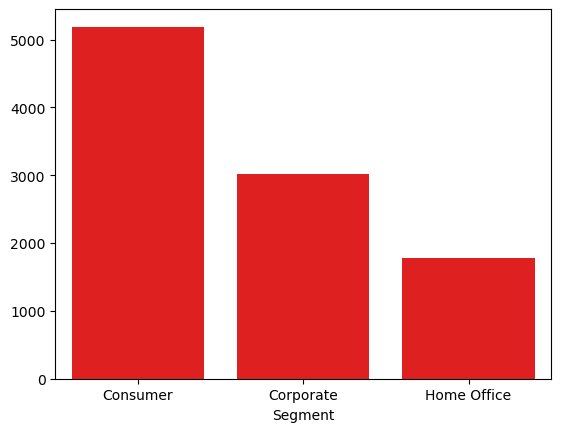

In [202]:
sns.barplot(x=segment.index , y=segment.values , color ='r')

In [203]:
r = df.groupby('Region')['Sales'].sum()

<Axes: xlabel='Region'>

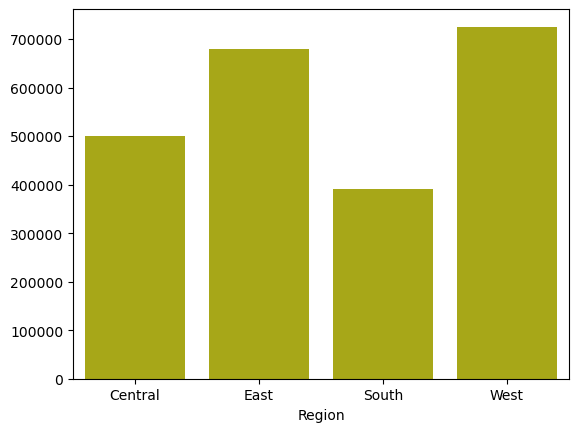

In [204]:
sns.barplot(x=r.index , y=r.values , color ='y')

In [205]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,date_diff
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,4


In [206]:
ship = df['Ship Mode'].value_counts()

<Axes: xlabel='Ship Mode'>

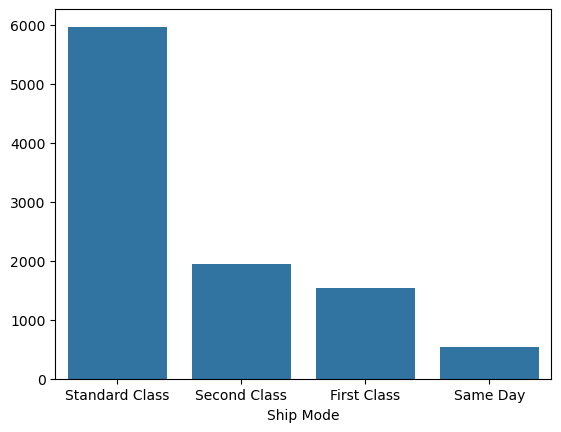

In [207]:
sns.barplot(x=ship.index ,y=ship.values)

In [208]:
cls = df.groupby('Ship Mode')['Sales'].sum().apply(lambda x: f"{x:,.0f}")

In [209]:
ship

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

<BarContainer object of 4 artists>

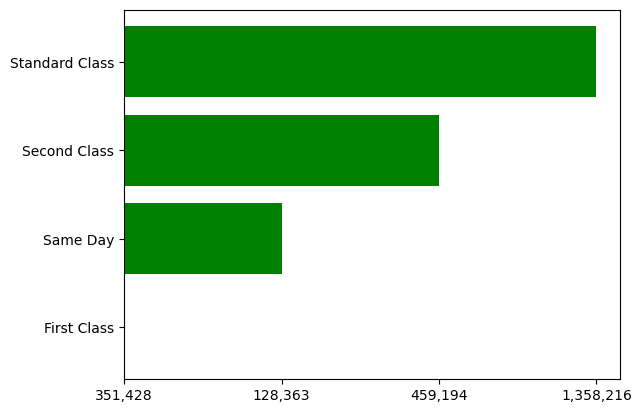

In [210]:
plt.barh(cls.index , cls.values , color = 'g')

In [211]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,date_diff
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7


In [212]:
city = df.groupby('City')['Sales'].sum()

In [213]:
city

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [214]:
len(df['City'].value_counts())

531

In [215]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'date_diff'],
      dtype='object')

In [216]:
group = df.groupby(['Ship Mode' , 'Sub-Category'])['Sales'].sum()

In [217]:
group

Ship Mode       Sub-Category
First Class     Accessories      22226.6920
                Appliances       15726.0240
                Art               3470.0880
                Binders          36157.8130
                Bookcases        21065.3189
                                   ...     
Standard Class  Paper            45160.2620
                Phones          197147.7220
                Storage         140250.7520
                Supplies         13216.5240
                Tables          124826.6615
Name: Sales, Length: 68, dtype: float64

In [218]:
category = df.groupby('Sub-Category')['Sales'].sum()

In [219]:
category

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

<BarContainer object of 17 artists>

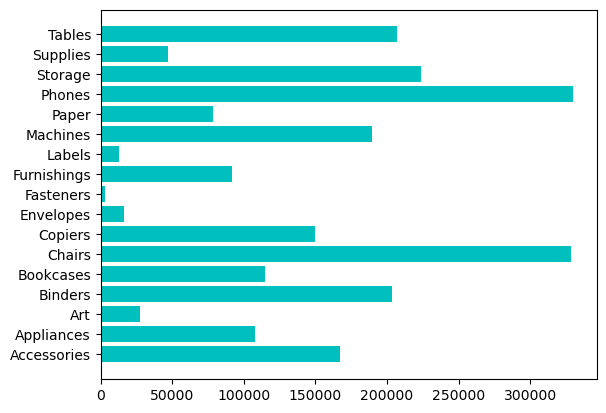

In [220]:
plt.barh(category.index , category.values , color = 'c')

In [221]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,date_diff
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [222]:
pd.crosstab(df['Sub-Category'] , df['Quantity'])

Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Sub-Category,,,,,,,,,,,,,,
Accessories,66,179,196,97,92,41,47,17,22,7,3,3,2,3
Appliances,39,122,102,65,57,29,27,12,7,1,1,1,2,1
Art,70,187,204,86,100,41,57,19,24,5,1,1,0,1
Binders,126,348,355,179,201,102,99,44,37,10,6,3,8,5
Bookcases,22,58,49,25,31,12,14,5,7,3,0,1,1,0
Chairs,54,149,149,73,75,39,31,18,18,3,2,1,1,4
Copiers,7,21,10,10,13,2,3,1,1,0,0,0,0,0
Envelopes,25,69,67,21,28,13,17,5,9,0,0,0,0,0
Fasteners,13,44,47,29,33,16,18,5,6,0,1,2,2,1


In [223]:
df.groupby('Sub-Category')['Quantity'].count().sort_values(ascending=False)

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Quantity, dtype: int64

In [224]:
df.groupby('Category')['Quantity'].count().sort_values(ascending=False)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Quantity, dtype: int64

In [225]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [226]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,date_diff
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [227]:
df.groupby('Sub-Category')['Discount'].sum().sort_values(ascending=False)

Sub-Category
Binders        567.00
Phones         137.40
Furnishings    132.40
Chairs         105.00
Paper          102.60
Tables          83.35
Appliances      77.60
Storage         63.20
Accessories     60.80
Art             59.60
Bookcases       48.14
Machines        35.20
Labels          25.00
Envelopes       20.40
Fasteners       17.80
Supplies        14.60
Copiers         11.00
Name: Discount, dtype: float64

In [228]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [232]:
df.groupby(['Customer Name' ,'City' ,'Sub-Category'])['Sales'].sum()

Customer Name       City           Sub-Category
Aaron Bergman       Arlington      Storage          12.624
                    Oklahoma City  Bookcases       341.960
                                   Phones          221.980
                    Seattle        Art              17.940
                                   Chairs           48.712
                                                    ...   
Zuschuss Donatelli  Richmond       Furnishings      71.120
                                   Phones          259.960
                    San Francisco  Art               8.560
                                   Binders          22.720
                                   Phones          213.480
Name: Sales, Length: 9049, dtype: float64

In [235]:
len(df['Customer Name'].unique())

793

In [236]:
len(df['Customer Name'])

9994

In [237]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'date_diff'],
      dtype='object')